<a href="https://colab.research.google.com/github/2303a52209/Gen-AI/blob/main/Assignment_9_1_2209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1166 - loss: 2.2968 - val_accuracy: 0.1284 - val_loss: 2.2863
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1295 - loss: 2.2824 - val_accuracy: 0.1394 - val_loss: 2.2712
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1410 - loss: 2.2673 - val_accuracy: 0.1487 - val_loss: 2.2567
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1462 - loss: 2.2526 - val_accuracy: 0.1572 - val_loss: 2.2425
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1538 - loss: 2.2388 - val_accuracy: 0.1634 - val_loss: 2.2284
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1625 - loss: 2.2261 - val_accuracy: 0.1731 - val_loss: 2.2141
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1737 - loss: 2.2112 - val_accuracy: 0.1846 - val_loss: 2.1993
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step -

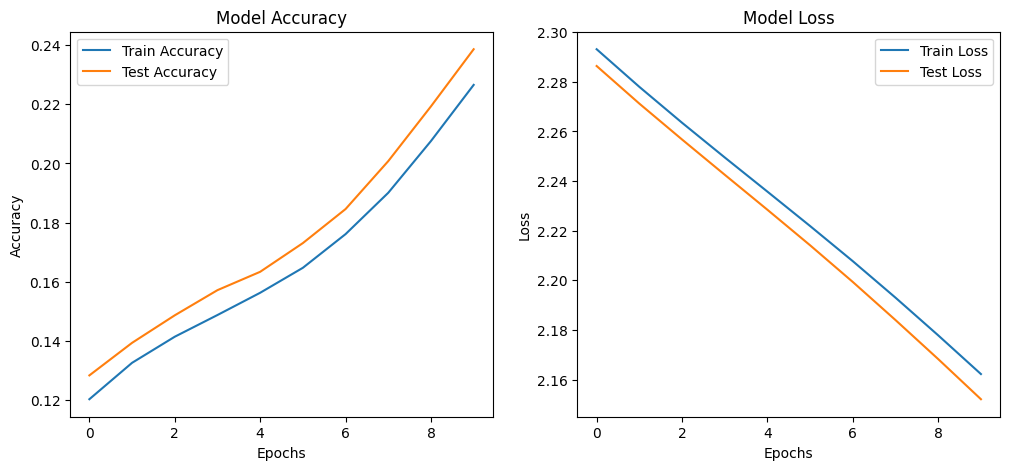

Training model with layers [64, 64, 64] and activation relu
Test Accuracy: 0.3403

Training model with layers [128, 64, 32] and activation relu
Test Accuracy: 0.3227

Training model with layers [256, 128, 64] and activation tanh
Test Accuracy: 0.7855

Best Architecture: ([256, 128, 64], 'tanh') with Test Accuracy: 0.7855


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten input data
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Define the ANN model
def build_model(hidden_layers=[32, 32, 32], activation='relu', optimizer='adadelta'):
    model = keras.Sequential()
    model.add(layers.Input(shape=(28*28,)))  # Input layer

    # Adding hidden layers
    for neurons in hidden_layers:
        model.add(layers.Dense(neurons, activation=activation))

    # Output layer
    model.add(layers.Dense(10, activation='softmax'))
# Compile the model
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Create model with initial architecture
model = build_model()

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

# Hyperparameter tuning: Trying different architectures
def tune_model():
    architectures = [
        ([64, 64, 64], 'relu'),
        ([128, 64, 32], 'relu'),
        ([256, 128, 64], 'tanh')
    ]

    best_acc = 0
    best_arch = None

    for layers, activation in architectures:
        print(f"Training model with layers {layers} and activation {activation}")
        model = build_model(hidden_layers=layers, activation=activation)
        model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0, validation_data=(x_test, y_test))

        _, test_acc = model.evaluate(x_test, y_test, verbose=0)
        print(f"Test Accuracy: {test_acc:.4f}\n")

        if test_acc > best_acc:
            best_acc = test_acc
            best_arch = (layers, activation)

    print(f"Best Architecture: {best_arch} with Test Accuracy: {best_acc:.4f}")

tune_model()